In [1]:
!pwd

/Users/yizhuoli/Downloads/Courses/NLP/Assignment_2


In [2]:
database = '/Users/yizhuoli/Downloads/Courses/NLP/Assignment_2/sqlResult_1558435.csv'

In [3]:
import os

In [5]:
os.path.exists(database)

True

In [6]:
import pandas as pd

In [7]:
dataframe = pd.read_csv(database, encoding='gb18030')

In [14]:
dataframe.sample(3)

,id,author,source,content,feature,title,url
82030,7581,陈诚,新华社,新华社照片，内罗毕，2017年5月31日\n（国际）（3）蒙内铁路通车“中国制造”开启东非铁...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（国际）（3）蒙内铁路通车 “中国制造”开启东非铁路新里程,http://home.xinhua-news.com/gdsdetailxhsnew/21...
35943,53669,HANNAH MCKAY,新华社,新华社照片，外代，2017年4月21日\n（外代二线）伦敦大本钟\n这是4月20日在英国伦敦...,"{""type"":""政治法律"",""site"":""新华社"",""url"":""http://home...",[1]（外代二线）伦敦大本钟,http://home.xinhua-news.com/gdsdetailxhsnew/19...
67406,22206,ETTORE FERRARI,新华社,新华社照片，外代，2017年5月19日\n（外代二线）网球——意大利公开赛：兹韦列夫晋级\n...,"{""type"":""足球"",""site"":""新华社"",""url"":""http://home.x...",[2]（外代二线）网球——意大利公开赛：兹韦列夫晋级,http://home.xinhua-news.com/gdsdetailxhsnew/20...


In [15]:
len(dataframe)

89611

In [18]:
all_articles = dataframe['content'].tolist()
all_articles[:2]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n']

In [19]:
import re

In [20]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [21]:
# test
string = '****&& &^$%% $#$ this is a verty intersalsfjkaeijisajflas'

In [22]:
token(string)

'this is a verty intersalsfjkaeijisajflas'

In [25]:
token('要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n')

'要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息'

In [26]:
all_articles = [token(str(a)) for a in all_articles]
all_articles[:3]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台',
 '此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个']

In [28]:
text = ''

for a in all_articles:
    text += a
print('length of text: {}'.format(len(text)))

length of text: 37412506


In [29]:
TEXT = text

In [30]:
from functools import reduce

In [32]:
txt_from_reduce = reduce(lambda a1, a2: a1+a2, all_articles[:10])
type(txt_from_reduce)

str

# Regular Expression

In [33]:
patten = '\w+'

In [34]:
re.findall(patten, string)

['this', 'is', 'a', 'verty', 'intersalsfjkaeijisajflas']

In [35]:
import requests

In [36]:
url = 'https://movie.douban.com/'

In [37]:
response = requests.get(url)

In [55]:
image_patten = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.jpg')

In [39]:
html_content = response.text

In [40]:
pict = re.search(url_patten, html_content)

In [51]:
pict[0]

'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg'

In [49]:
pict.group(0)

'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg'

In [58]:
image_patten.findall(html_content)

['https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552608202.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551249211.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2553090666.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552522615.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549558913.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551172384.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549523952.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549177902.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549353234.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

In [59]:
import matplotlib.pyplot as plt

## Got all tokens

In [61]:
import jieba

In [62]:
def cut(string): return list(jieba.cut(string))

In [63]:
cut('这个好这个不好')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/lj/4wr4337s4_76_jy8b20q75dr0000gn/T/jieba.cache
Loading model cost 0.809 seconds.
Prefix dict has been built succesfully.


['这个', '好', '这个', '不好']

In [64]:
ALL_TOKENS = cut(TEXT) 

In [65]:
valid_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']

In [67]:
len(ALL_TOKENS)

21906852

In [68]:
len(valid_tokens)

17221785

In [69]:
valid_tokens[:20]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日',
 '起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已']

## Get frequences of words

In [70]:
from collections import Counter

In [71]:
Counter([1,1,2,2,3,3,1,0])

Counter({1: 3, 2: 2, 3: 2, 0: 1})

In [73]:
words_count = Counter(valid_tokens)

In [74]:
words_count.most_common(10)

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

In [88]:
frequences = [f for w, f in words_count.most_common(100)]

In [89]:
x = [i for i in range(len(frequences[:100]))]

In [90]:
len(frequences)

100

In [91]:
%matplotlib inline

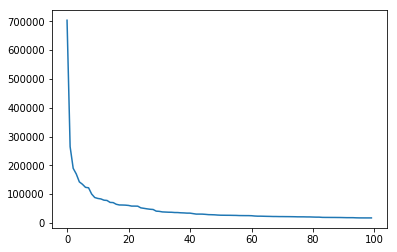

In [92]:
plt.plot(x, frequences)

In [93]:
import numpy as np

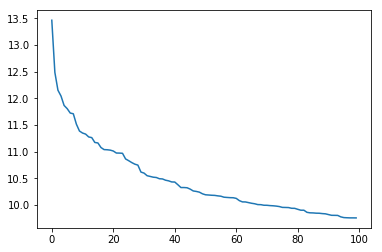

In [94]:
plt.plot(x, np.log(frequences))

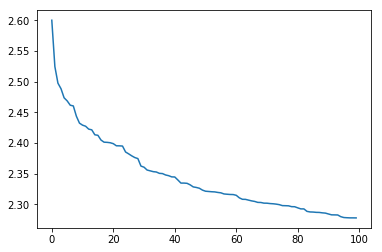

In [95]:
plt.plot(x, np.log(np.log(frequences)))

In [96]:
frequences_all = [f for w, f in words_count.most_common()]

In [97]:
frequences_sum = sum(frequences_all)

In [98]:
frequences_sum

17221785

In [99]:
1 / frequences_sum

5.8065990255946174e-08

In [100]:
def get_prob(word):
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return esp  

In [102]:
get_prob('我们')

0.0011602746172943166

In [103]:
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

In [104]:
product([1,2,3,4,10])

240

In [105]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [106]:
language_model_one_gram('什么三门峡要举办奥运会了？')

6.712788788284616e-30

In [107]:
language_model_one_gram('我爱吃冰淇淋')

1.6861071293309696e-17

In [108]:
language_model_one_gram('小狗真可爱')

7.102529741659306e-15

In [109]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [110]:
for s in sentences:
    print(s, language_model_one_gram(s))

这是一个比较正常的句子 7.429984647015532e-22
这个一个比较罕见的句子 1.7566783516469408e-22
小明毕业于清华大学 3.039960976514903e-18
小明毕业于秦华大学 5.813337476916057e-24


In [111]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


## 2-Gram

### Get the combination probability of 2-grams

In [112]:
valid_tokens = [str(t) for t in valid_tokens]

In [113]:
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [114]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum

In [115]:
get_combination_prob('去', '北京')

1.8000459069772276e-06

In [116]:
get_combination_prob('出', '去玩')

5.8065996999265405e-08

In [117]:
get_combination_prob('找到', '工作')

8.129239579897157e-07

In [118]:
get_combination_prob('去', '纽约')

2.3226398799706162e-07

In [119]:
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [120]:
get_prob_2_gram('去', '沈阳')

0.0006857770649650213

In [121]:
get_prob_2_gram('去', '北京')

0.004251817802783131

In [123]:
def langauge_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [124]:
langauge_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

4.5133725473313174e-18

In [125]:
langauge_model_of_2_gram('小明今天抽奖抽到一台灯')

3.835164224147376e-18

In [126]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = langauge_model_of_2_gram(s1), langauge_model_of_2_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 6.82225584071837e-14
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


In [128]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [130]:
import random

In [131]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [132]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [133]:
g = parse_grammar(grammar)

In [134]:
random_generated = [gene(g) for _ in range(100)]

In [135]:
s1 = {1, 2, 3}

In [136]:
s2 = {4, 5, 2}

In [137]:
s1 | s2

{1, 2, 3, 4, 5}

In [138]:
sorted(random_generated, key=langauge_model_of_2_gram, reverse=True)

['一个女人的裙子看着一个女人的眼睛',
 '一个女人的胳膊看着这个小猫的眼睛',
 '一个女人的眼睛看见这个女人的裙子',
 '一个小猫的胳膊看着这个女人的胳膊',
 '一个桌子的裙子看见一个女人的裙子',
 '一个女人的眼睛看着这个篮球的裙子',
 '这个女人的眼睛看着这个小猫的尾巴',
 '一个女人的裙子看见这个小小的女人的裙子',
 '一个桌子的眼睛坐在一个桌子的眼睛',
 '这个桌子的裙子看着这个小猫的胳膊',
 '这个小猫的眼睛看着这个桌子的胳膊',
 '这个篮球的尾巴看见一个女人的尾巴',
 '一个女人的眼睛坐在一个篮球的尾巴',
 '这个小小的女人的裙子坐在一个女人的尾巴',
 '这个小猫的胳膊看着一个女人的裙子',
 '这个篮球的眼睛看见一个桌子的眼睛',
 '这个女人的尾巴听着这个桌子的眼睛',
 '这个桌子的尾巴看见这个篮球的胳膊',
 '这个桌子的胳膊听着一个女人的尾巴',
 '这个小小的女人的胳膊坐在这个桌子的眼睛',
 '一个桌子的胳膊坐在一个桌子的裙子',
 '这个小猫的眼睛听着一个女人的裙子',
 '这个篮球的眼睛看着这个小猫的裙子',
 '这个小猫的眼睛听着一个桌子的眼睛',
 '这个小猫的胳膊听着一个小猫的眼睛',
 '这个小小的篮球的胳膊看见这个女人的尾巴',
 '一个篮球的尾巴坐在这个篮球的眼睛',
 '一个小小的小猫的胳膊看着这个篮球的裙子',
 '一个小小的桌子的裙子看见这个篮球的尾巴',
 '一个小猫的尾巴听着这个小猫的胳膊',
 '这个小猫的裙子听着一个桌子的裙子',
 '一个小小的桌子的裙子听着一个桌子的胳膊',
 '这个篮球的胳膊坐在这个小小的小猫的胳膊',
 '这个篮球的裙子听着一个桌子的尾巴',
 '一个小小的小小的桌子的裙子看见一个小小的女人的尾巴',
 '一个好看的女人的裙子看见这个篮球的胳膊',
 '一个小小的小小的小猫的眼睛看着这个小小的桌子的尾巴',
 '这个小小的小小的小小的女人的尾巴看着这个篮球的眼睛',
 '一个桌子的裙子坐在一个好看的女人的裙子',
 '这个蓝色的小猫的裙子看着这个篮球的眼睛',
 '一个小小的女人的尾巴看见一个好看的女人的裙子',
 '一个桌子的裙子听着一个小小的小小的桌子的裙子',
 '一个小猫的胳膊听着这个好看的女人的眼睛',
 '这个小猫的眼睛坐在一个蓝色的篮球的眼睛'